In [1]:
import os
import glob
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Imposto il percorso
folder_path2 = '..\Dati\Dati_Luigi_Nuovo'

excel_files2 = glob.glob(os.path.join(folder_path2, "*.xlsx"))

# Creo lista per i dataframes
dfs2 = []

# Creo una lista di colonna per import dei file excel, non essendoci intestazione
column_headers = [chr(ord('A') + i) for i in range(32)]

In [3]:
# Per ogni file, salvo i dati su dataframe
for excel_file2 in excel_files2:
    # leggo i file e specifico le colonne
    df2 = pd.read_excel(excel_file2, header=None, names=column_headers[:pd.read_excel(excel_file2).shape[1]])
    df2['File_Name'] = os.path.basename(excel_file2)  # Aggiungo la colonna 'File_Name' utilizzando il nome di base del file
    
    df2 = df2[['File_Name', 'D', 'H', 'J', 'L']] # Nome File, Time, HR, RR, HRV solo queste colonne da salvare

    dfs2.append(df2)

# Unisco tutti i DataFrames in un unico DataFrame
merged_df2 = pd.concat(dfs2)

In [4]:
folder_path1 = "..\Dati\Dati_Luigi_arousal"

excel_files1 = glob.glob(os.path.join(folder_path1, "*.xlsx"))

dfs1 = []

for i, excel_file1 in enumerate(excel_files1):
    df1 = pd.read_excel(excel_file1)
    df1['File_Name'] = os.path.basename(excel_file1) 
    df1['Progressivo'] = i  # Aggiungo la colonna 'Progressivo' con il numero del file, magari può essere utile se si vuole studiare singolo file
    dfs1.append(df1)

In [5]:
# join tutti i DataFrames
merged_df1 = pd.concat(dfs1)

merged_df1.reset_index(drop=True, inplace=True)

In [6]:
# rinomino colonne per essere più parlanti
merged_df2 = merged_df2.rename(columns={'D':'Time','H':'HR','J':'RR','L':'HRV'})

In [7]:
joined_df = pd.merge(merged_df1, merged_df2, on=['File_Name','Time'], how='left')


In [8]:
joined_df['Arousal_Bin'] = pd.cut(joined_df['Arousal'], bins=4)

In [9]:
# ogni bin [50,100) avrà un numero progressivo da 0 a 3
bin_mapping = {bin_val: i for i, bin_val in enumerate(joined_df['Arousal_Bin'].unique())}

# sort dei bin
sorted_bins = sorted(joined_df['Arousal_Bin'].unique())

# mappo ogni bin al numero
bin_mapping = {bin_val: i for i, bin_val in enumerate(sorted_bins)}

# salvo il mapping in una nuova colonna
joined_df['Bin_Num'] = joined_df['Arousal_Bin'].map(bin_mapping)

In [11]:
joined_df.loc[:, 'Timestamp'] = joined_df['Time'].apply(lambda x: x.hour) * 3600 + joined_df['Time'].apply(lambda x: x.minute) * 60 + joined_df['Time'].apply(lambda x: x.second)


In [12]:
# only use down of here

In [22]:
print(joined_df)

            Time  Valance  Arousal              File_Name  Progressivo  HR  \
0       10:07:43       -1      201  AVL_BD_20211104G.xlsx            0  73   
1       10:07:43       -1      201  AVL_BD_20211104G.xlsx            0  73   
2       10:07:43       -1      201  AVL_BD_20211104G.xlsx            0  73   
3       10:07:43       -1      201  AVL_BD_20211104G.xlsx            0  73   
4       10:07:44       -1      201  AVL_BD_20211104G.xlsx            0  72   
...          ...      ...      ...                    ...          ...  ..   
169461  18:25:41       84      116  AVL_SN_20211103G.xlsx           14  73   
169462  18:25:42       83      117  AVL_SN_20211103G.xlsx           14  73   
169463  18:25:43       82      118  AVL_SN_20211103G.xlsx           14  74   
169464  18:25:44       81      119  AVL_SN_20211103G.xlsx           14  74   
169465  18:25:45       80      120  AVL_SN_20211103G.xlsx           14  75   

        RR  HRV     Arousal_Bin Bin_Num  Timestamp  
0       22

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
progressivo = 0

# What to plot
X_axis = "Timestamp"
Y_Axis = "Arousal"

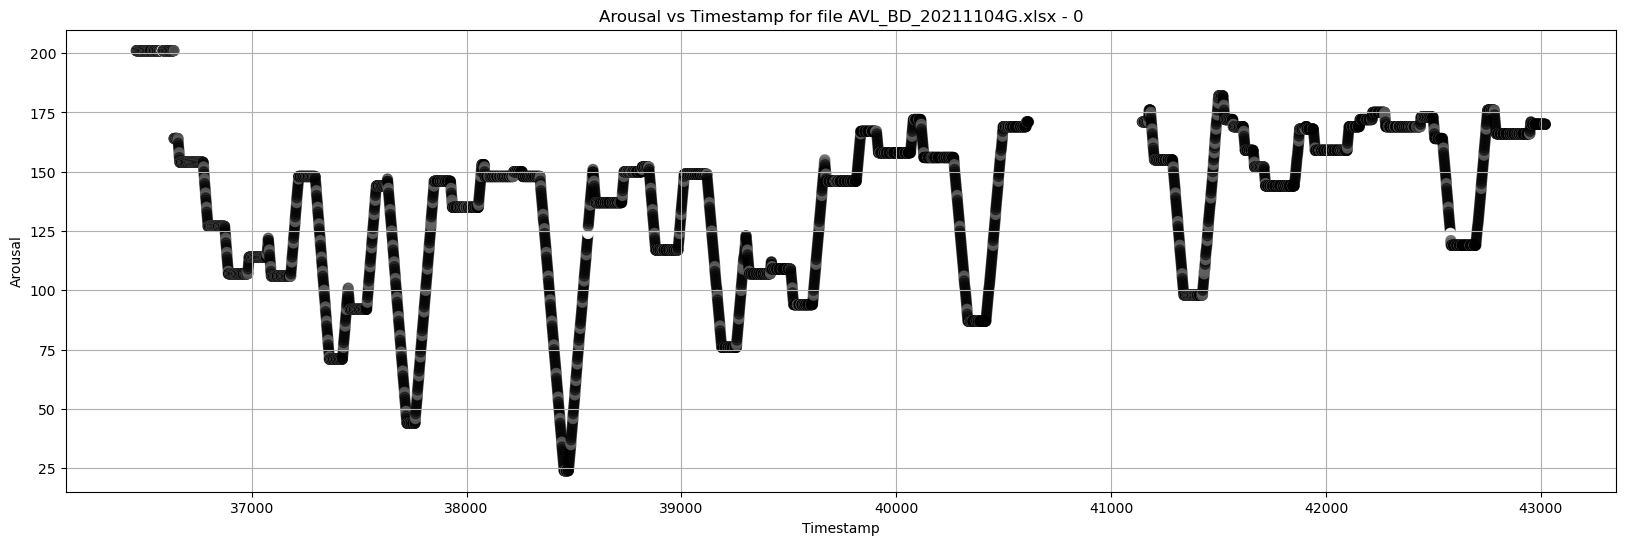

In [72]:
# Filter the data for Progressivo=0
filtered_data = joined_df[joined_df["Progressivo"] == progressivo]

# Convert the Timestamp column to datetime


# Count the occurrences of each timestamp
timestamp_counts = filtered_data[f"{X_axis}"].value_counts()

# Create the scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(
    filtered_data[f"{X_axis}"], 
    filtered_data[f"{Y_Axis}"], 
    c=timestamp_counts[filtered_data[f"{X_axis}"]],  # Use the counts for color
    cmap="gray",  # Choose a grayscale colormap
    s=50,  # Size of the scatter points
    alpha=0.5  # Set a transparency level
)

unique_file_name = filtered_data["File_Name"].iloc[0]

# Customize the plot
plt.title(f"{Y_Axis} vs {X_axis} for file {unique_file_name} - {progressivo}")
plt.xlabel(f"{X_axis}")
plt.ylabel(f"{Y_Axis}")
plt.grid(True)
#plt.colorbar(label="Data Count")

# Display the plot
plt.show()

In [28]:
count_progressivo_0 = len(joined_df[joined_df["Progressivo"] == 0])

# Display the count
print(f"Number of lines with Progressivo = 0: {count_progressivo_0}")

Number of lines with Progressivo = 0: 8091


In [40]:
unique_file_name = filtered_data["File_Name"].iloc[0]

print(f"The associated File_Name for Progressivo=0 is: {unique_file_name}")

The associated File_Name for Progressivo=0 is: AVL_BD_20211104G.xlsx
